In [26]:
#library
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use(['science','notebook','gried'])
import numba
from numba import njit
from scipy.ndimage import convolve, generate_binary_structure

In [27]:
# a grid N by N
N=50

Generate some initial random  grieds of spin

In [31]:
init_random=np.random.random((N,N))
lattice_n=np.zeros((N,N))
lattice_n[init_random>=0.75]=1
lattice_n[init_random<=0.75]=-1

init_random=np.random.random((N,N))
lattice_p=np.zeros((N,N))
lattice_p[init_random>=0.25]=1
lattice_p[init_random<=0.25]=-1


show inital lattice of spin

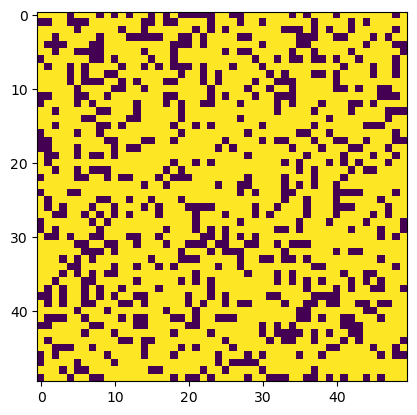

In [34]:
plt.imshow(lattice_p)

function to get energy E/J=-sigma(xj*xi)

In [36]:
def get_energy(lattice):
    #appliest the nearest neighbors simulation
    kern=generate_binary_structure(2,1)
    kern[1][1]=False
    arr=-lattice*convolve(lattice, kern,mode='constant')
    return arr.sum()

In [39]:
get_energy(lattice_p)

-2112.0

The metropolies algorithm

In [42]:
#@numba.njit("UniTuple (f8[:], 2)(f8[::], i8, f8, f8)", nopython=True, nogil=True)

def metropolis(spin_arr, times, BJ, energy):

    spin_arr=spin_arr.copy()
    net_spins=np.zeros(times-1)
    net_energy=np.zeros(times-1)
    for t in range(0,times-1):
        x=np.random.randint(0,N)
        y=np.random.randint(0,N)
        spin_i=spin_arr[x,y]#inital spin
        spin_f=spin_i*-1 #proposed spin flip
        E_i=0
        E_f=0
        if x>0:
            E_i+=-spin_i*spin_arr[x-1,y]
            E_f+=-spin_f*spin_arr[x-1,y]
        if x<N-1:
            E_i+=-spin_i*spin_arr[x+1,y]
            E_f+=-spin_f*spin_arr[x+1,y]
        if y>0:
            E_i+=-spin_i*spin_arr[x,y-1]
            E_f+=-spin_f*spin_arr[x,y-1]
        if y<N-1:
            E_i+=-spin_i*spin_arr[x,y+1]
            E_f+=-spin_f*spin_arr[x,y+1]
        dE=E_f-E_i
        if (dE>0)*(np.random.random()< np.exp(-BJ*dE)):
            spin_arr[x,y]=spin_f
            energy+=dE
        if dE<0:
            spin_arr[x,y]=spin_f
            energy+=dE
        net_spins[t]=spin_arr.sum()
        net_energy[t]=energy
    return net_spins , net_energy

In [44]:
spins, energies=metropolis(lattice_n,100000,0.7,get_energy(lattice_n))

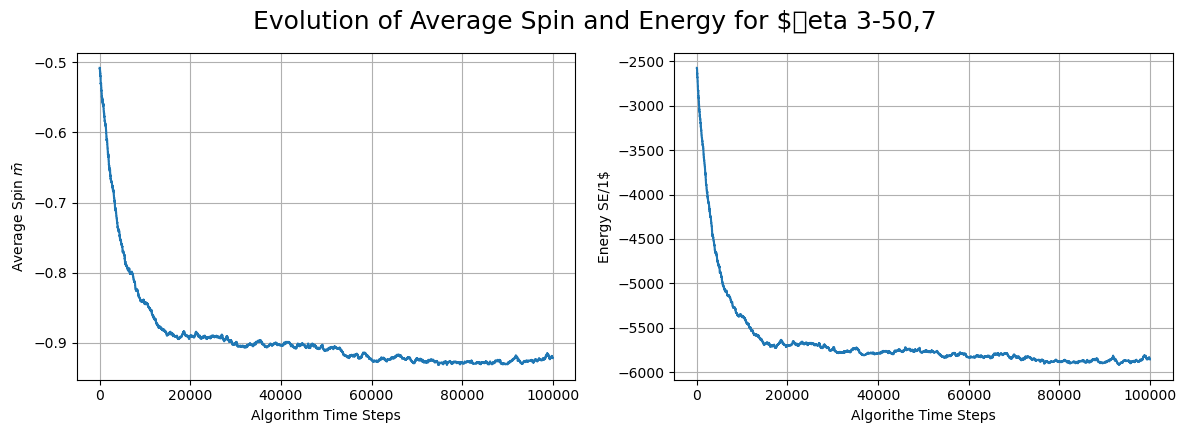

In [45]:
fig, axes=plt.subplots(1, 2, figsize=(12,4))

ax=axes[0]

ax.plot(spins/N**2)

ax.set_xlabel('Algorithm Time Steps')

ax.set_ylabel(r'Average Spin $\bar{m}$')

ax.grid()

ax=axes[1]

ax.plot(energies)

ax.set_xlabel('Algorithe Time Steps')

ax.set_ylabel(r'Energy SE/1$')

ax.grid()

fig.tight_layout()

fig.suptitle("Evolution of Average Spin and Energy for $\beta 3-50,7", y=1.07, size=18)

plt.show()

In [46]:
def get_spin_energy(lattice, BJs):
    ms=np.zeros(len(BJs))
    E_means=np.zeros(len(BJs))
    E_stds=np.zeros(len(BJs))

    for i, bj in enumerate(BJs):

      spins, energies=metropolis (lattice, 1000000, bj, get_energy(lattice))

      ms[i]=spins[-100000:].mean()/N**2

      E_means[i]=energies[-100000:].mean()
      E_stds[i]=energies[-100000:].std()

    return ms, E_means, E_stds

BJs=np.arange(0.1,2, 0.05)

ms_n, E_means_n, E_stds_n=get_spin_energy(lattice_n, BJs)

ms_p, E_means_p, E_stds_p=get_spin_energy(lattice_p, BJs)


KeyboardInterrupt



In [ ]:
plt.figure(figsize=(8,5))

plt.plot(1/BJs, ms_n, 'o--', label='75% of spins started negative')

plt.plot(1/BJs, ms_p, 'o--', label='75% of spins started positive')

plt.xlabel(r'$\left(\frac{k}{3}\right)TS')

plt.ylabel(r'$\bar(m)$')

plt.legend(facecolor='white', framealpha=1)


In [ ]:
plt.plot(1/BJs, E_stds_n*BJs, label='75% of spins started neg') 
plt.plot(1/BJs, E_stds_p*BJs, label='75% of spins started pos')
plt.xlabel('$\left(\frac{(3)\right)15')

plt.ylabel(r'SCV/k^25')

plt.legend()
plt.show

In [ ]:
Ns = [10, 20, 50, 100, 1000]  # System Size
T_Tcs = np.linspace(0.5, 1.7, 30)  # T/Tc
Tc = 2.268  # Onsager's Tc

for n in Ns:
    avgspins = []
    for i, T_Tc in enumerate(T_Tcs):
        T = T_Tc*Tc
        indices, spins = np.loadtxt('magnetization/size-{0}/temp-{1}/temp-{1}.out'.format(n,i), unpack =True)
        spins = spins[int(len(spins)/2):]
        avgspin = np.sum(np.abs(spins)) / n ** 2 / len(spins)
        avgspins.append(avgspin)
    plt.plot(T_Tcs, avgspins, 'o-', label = 'L = {0}'.format(n))

plt.xlabel('T/T$_{c}$', fontsize = 16)
plt.ylabel('<M$_{L}$>', fontsize = 16)
plt.legend()
plt.savefig('images/magnetization.png')
plt.show()